# Observations for the night July 09th 2021 : Try to use QuickLookExp v2


https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with Weakly_2021_36
- use jupyter kernel LSST
- requires the installation see https://github.com/stubbslab/PCWG-AuxTel/blob/main/setup_script.md
- requires to write in file {HOME}/notebooks/.user_setups


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2021/11/22
- update : 


In [12]:
#! eups list -s

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits

In [14]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

In [15]:
# correct for bug in stack in wl_2021_02
# %config IPCompleter.use_jedi=False

In [16]:
FLAG_SAVE_IMAGE=True

In [17]:
!ls /project/shared/auxTel/rerun/mfl/slurmRun

calexp	icExp  postISRCCD	     repositoryCfg.yaml  spectractorOutput
config	icSrc  processStar_metadata  schema


In [18]:
!ls /project/shared/auxTel

CALIB	   CALIB-OLD	 CALIB-RHL  Fossil   _parent.old  rerun
CALIB_OLD  calibrations  dagoret    _parent  ref_cats


In [19]:
!ls /project/shared/auxTel/rerun/quickLook -l

total 71
drwxrwsrwx  5 49813 1363  4096 Sep 30 12:50 calexp
drwxrwsrwx  2 49813 1363  4096 Feb 21  2020 config
drwxrwsrwx  5 49813 1363  4096 Sep 30 12:49 icExp
drwxrwsrwx  8 49813 1363  4096 Sep 30 12:49 icSrc
drwxrwsrwx  5 49813 1363  4096 Sep 30 12:48 postISRCCD
drwxrwsrwx 74 49813 1363 32768 Oct 16 21:42 quickLookExp
-rwxrwxrwx  1 49813 1363   458 Feb 21  2020 repositoryCfg.yaml
-rwxrwxrwx  1 49813 1363   458 May 16  2021 repositoryCfg.yaml_backup
drwxrwsrwx  5 49813 1363  4096 Sep 30 12:50 spectractorOutput


# Configuration

## Location and date

In [20]:
SOFT_VERSION="v2"

In [21]:
from lsst.rapid.analysis.nightReport import NightReporter
# data exist here
repoDir='/project/shared/auxTel/rerun/quickLook'
# recommended but wrong
#repoDir='project/shared/auxTel/rerun/mfl/slurmRun'
dayObs="2021-09-09"
reporter=NightReporter(repoDir,dayObs)

Loaded data for seqNums 1 to 817


# Selection

In [22]:
DISPERSER_SEL="ronchi170lpmm"

In [23]:
FLAG_FLAT_SELECTION=False

# Information from reporter

In [24]:
print(reporter.getObservedObjects())

['AT_TEST_SURVEY_TILE_0057', 'AT_TEST_SURVEY_TILE_0010', 'HD 206741', 'AT_TEST_SURVEY_TILE_0095', 'AT_TEST_SURVEY_TILE_0022', 'AT_TEST_SURVEY_TILE_0079', 'AT_TEST_SURVEY_TILE_0086', 'AT_TEST_SURVEY_TILE_0081', 'AT_TEST_SURVEY_TILE_0107', 'AT_TEST_SURVEY_TILE_0102', 'caltest33', 'AT_TEST_SURVEY_TILE_0048', 'caltest62', 'AT_TEST_SURVEY_TILE_0089', 'AT_TEST_SURVEY_TILE_0101', 'AT_TEST_SURVEY_TILE_0024', 'AT_TEST_SURVEY_TILE_0030', 'caltest32', 'AT_TEST_SURVEY_TILE_0031', 'caltest52', 'AT_TEST_SURVEY_TILE_0055', 'caltest38', 'AT_TEST_SURVEY_TILE_0080', 'PNG321.0+03.9', 'AT_TEST_SURVEY_TILE_0103', 'AT_TEST_SURVEY_TILE_0062', 'slew_icrs', 'AT_TEST_SURVEY_TILE_0100', 'AT_TEST_SURVEY_TILE_0069', 'AT_TEST_SURVEY_TILE_0112', 'caltest42', 'AT_TEST_SURVEY_TILE_0046', 'HD 17355', 'caltest28', 'AT_TEST_SURVEY_TILE_0068', 'AT_TEST_SURVEY_TILE_0039', 'AT_TEST_SURVEY_TILE_0028', 'HD 209073', 'AT_TEST_SURVEY_TILE_0013', 'AT_TEST_SURVEY_TILE_0043', 'AT_TEST_SURVEY_TILE_0085', 'HD 031128', 'caltest48', 'c

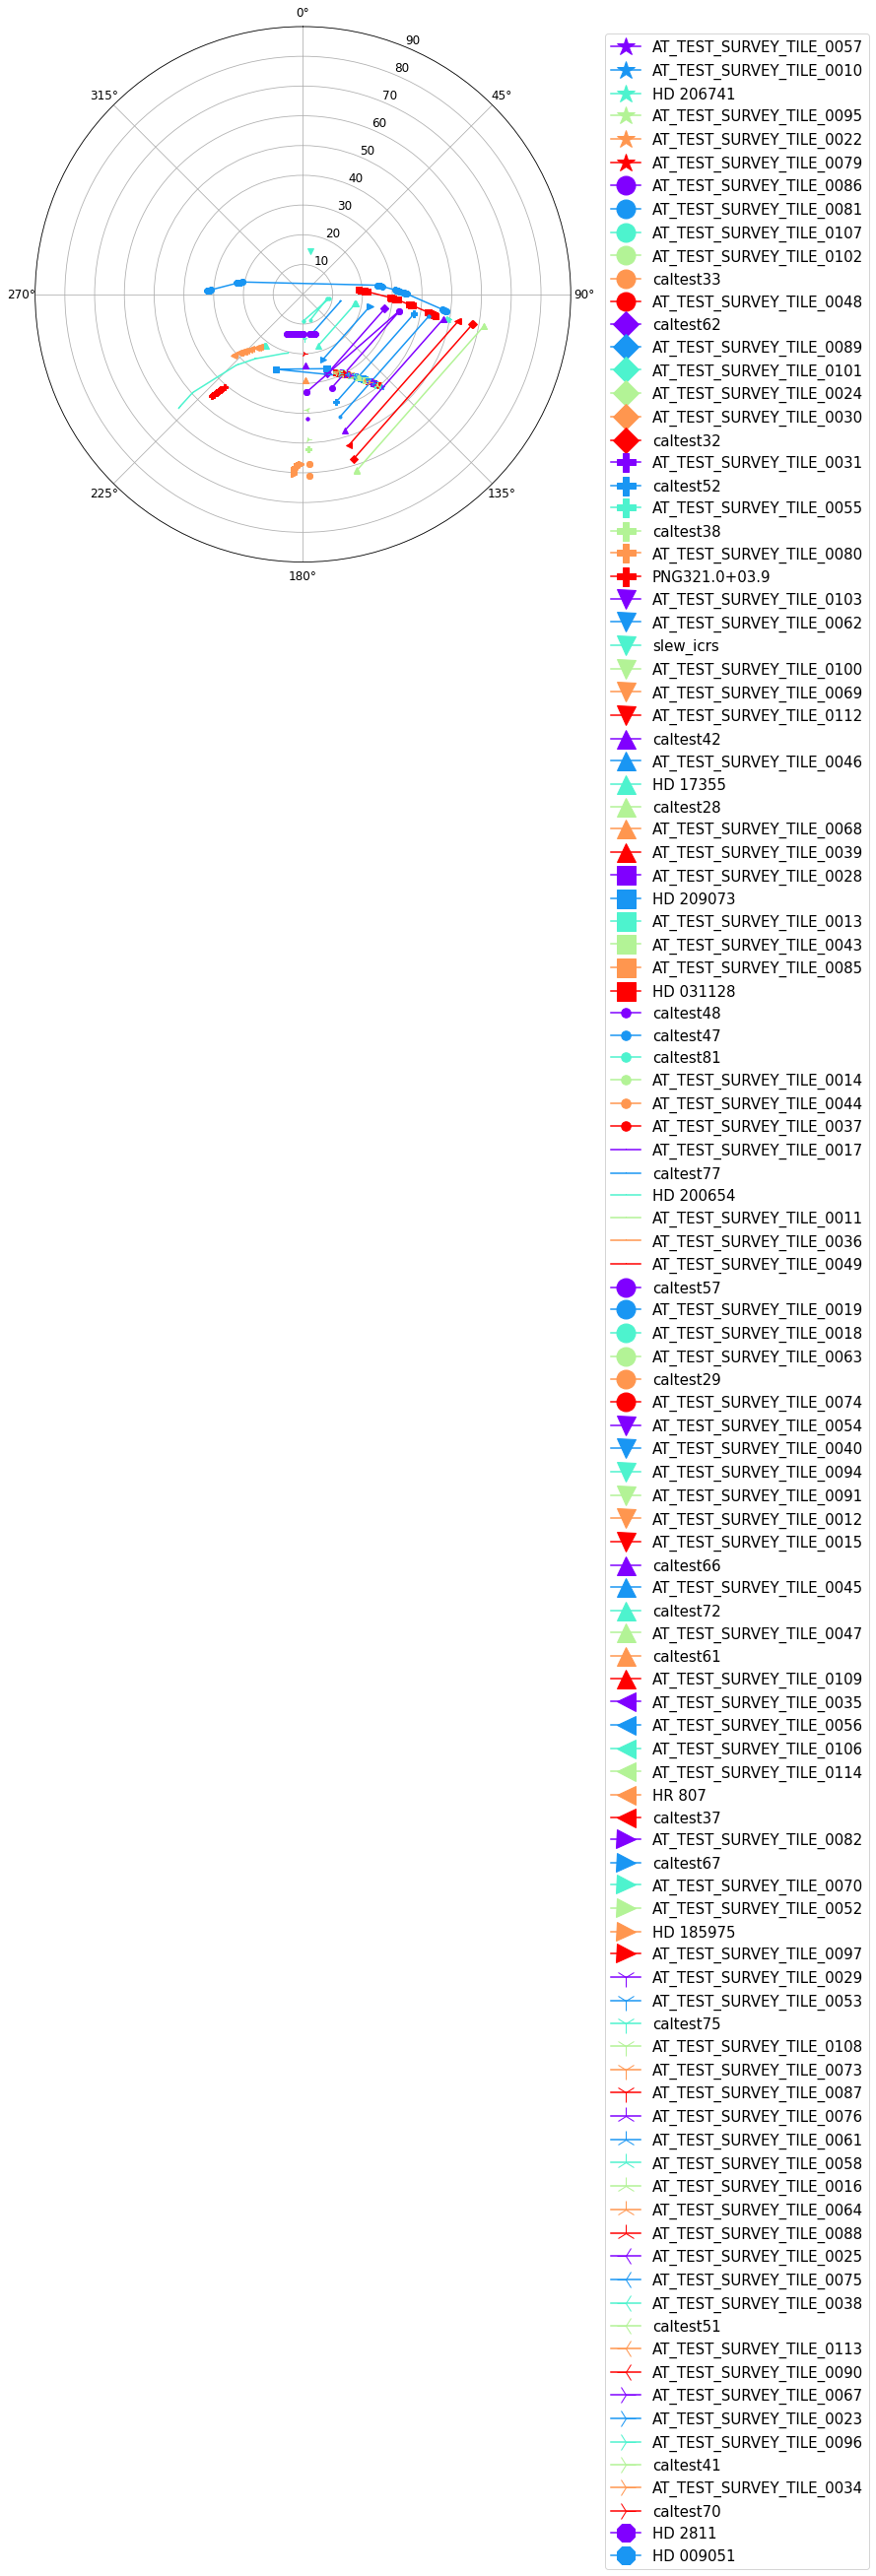

In [57]:
reporter.makePolarPlotForObjects()

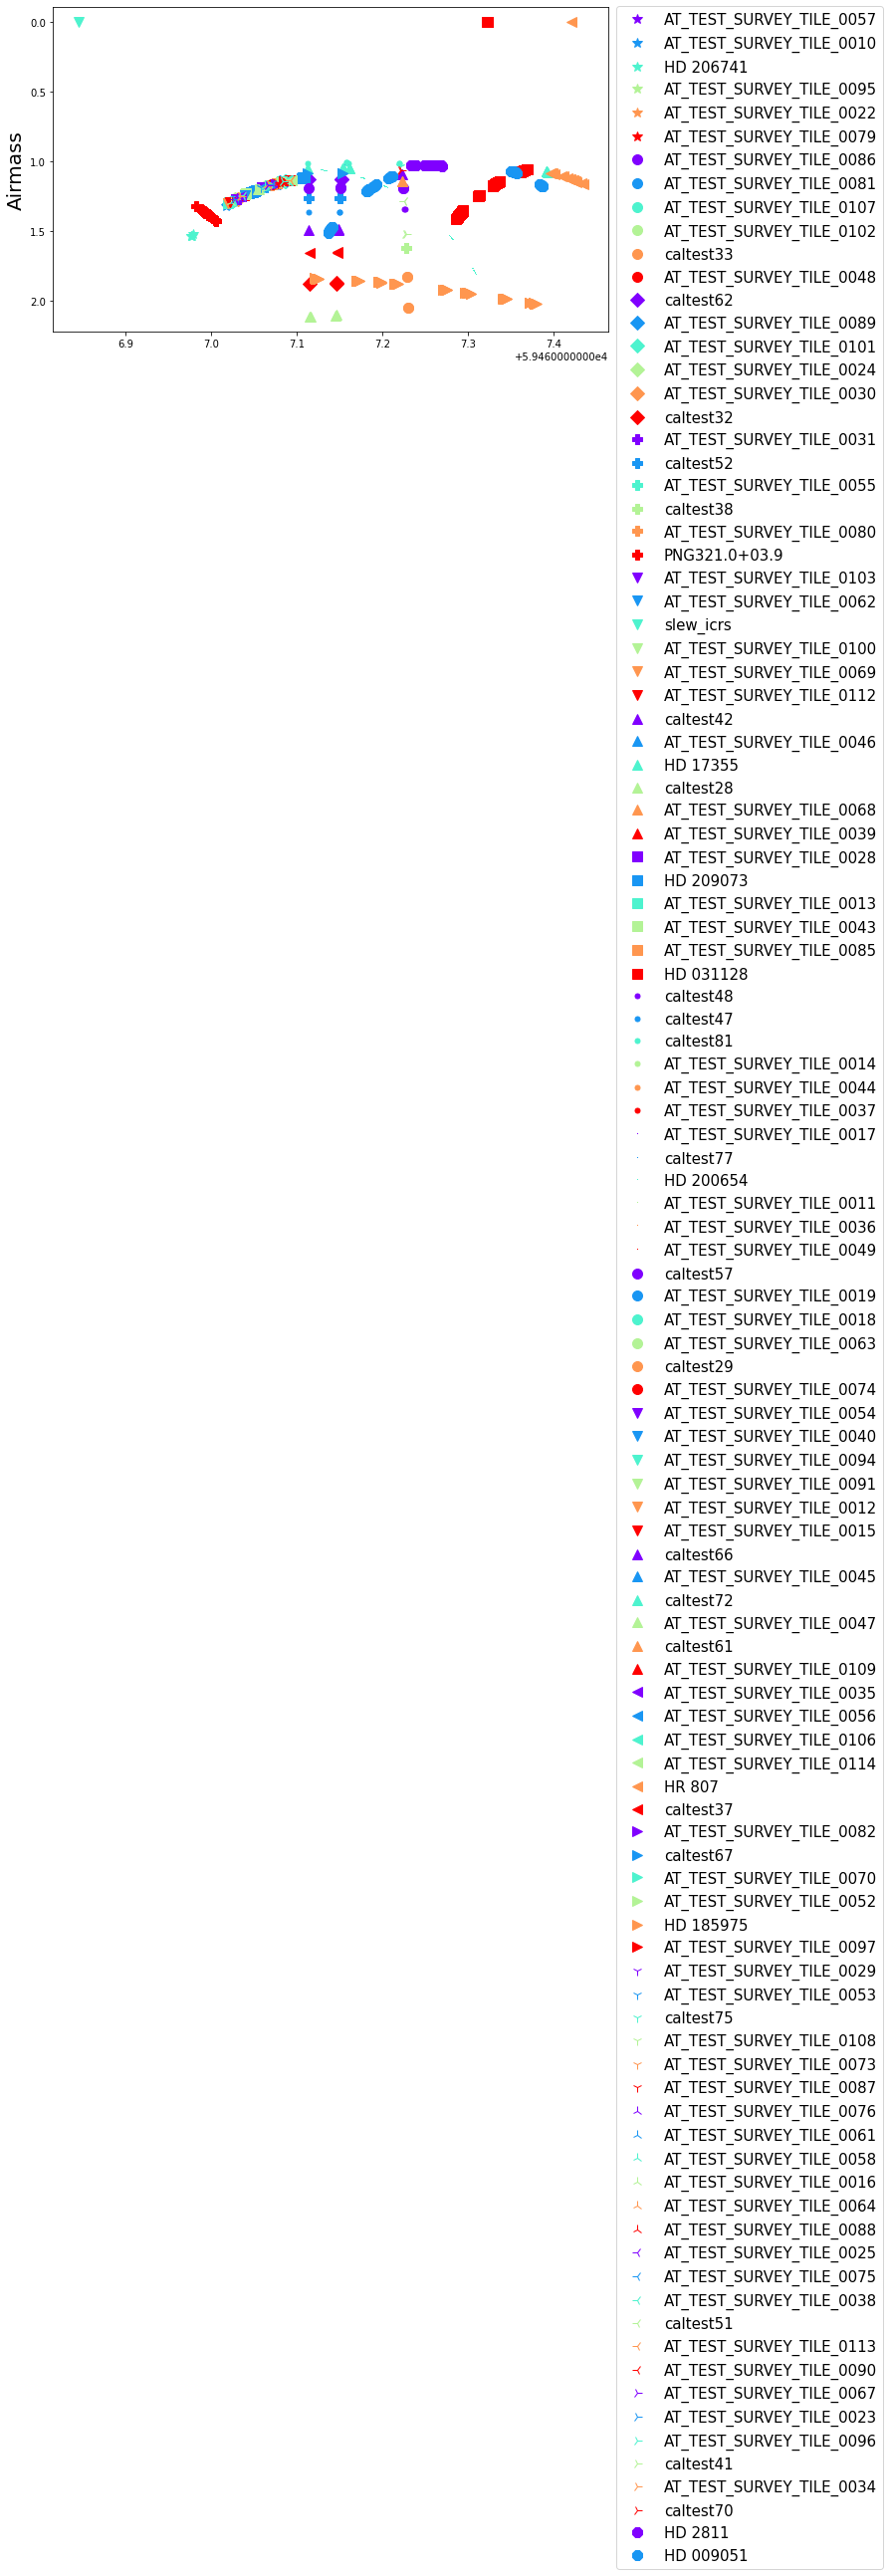

In [26]:
reporter.plotPerObjectAirMass()

In [27]:
reporter.printObsTable()

{seqNum} {imageType} {obj} {timeOfDay} {filt} {timeSinceLastExp} {expTime}
   1 bias      Park position 19:56:17.928 FELH0600~holo4_003           0.0  0.00
   2 bias      Park position 19:58:36.831 FELH0600~holo4_003         138.9  0.00
   3 engtest   slew_icrs  20:15:51.404 FELH0600~holo4_003        1034.6  2.00
   4 bias      FlatField position 20:34:33.961 FELH0600~holo4_003        1122.6  0.00
   5 bias      FlatField position 20:34:38.466 FELH0600~holo4_003           4.5  0.00
   6 bias      FlatField position 20:34:42.979 FELH0600~holo4_003           4.5  0.00
   7 bias      FlatField position 20:34:47.505 FELH0600~holo4_003           4.5  0.00
   8 bias      FlatField position 20:34:52.012 FELH0600~holo4_003           4.5  0.00
   9 bias      FlatField position 20:34:56.558 FELH0600~holo4_003           4.5  0.00
  10 bias      FlatField position 20:35:01.057 FELH0600~holo4_003           4.5  0.00
  11 bias      FlatField position 20:35:05.563 FELH0600~holo4_003           4.5  0.

# Butler

## Configuration for Butler

In [28]:
#butler=dafPersist.Butler("/project/shared/auxTel")
butler=dafPersist.Butler(repoDir)

## Sequence selection

In [29]:
# Flats
#all_myseq_flats=range(62,73)

# wide scan
# -----------
#all_myseq_holo=range(234,310)
# narrow scan
#-----------
all_myseq_ronchi=range(600,630)

if FLAG_FLAT_SELECTION:
    all_myseq=all_myseq_flats
else:
    all_myseq=all_myseq_ronchi

In [30]:
seqNum=all_myseq[0]

In [31]:
seqNum

600

## Display

In [32]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug_2021_07_07',url=os.environ["FIREFLY_URL"])

In [33]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [34]:
# and this command show the image
display1.mtv(raw)

In [35]:
display1.getClient().display_url()

## Access to image sequence

In [36]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 4, 8, 7, 5, 6, 13, 10, 12, 9, 11, 16, 19, 18, 17, 14, 15, 20, 21, 22, 24, 26, 25, 23, 30, 33, 32, 27, 31, 29, 28, 34, 39, 38, 37, 36, 35, 43, 46, 44, 42, 45, 41, 40, 53, 47, 50, 52, 48, 51, 49, 54, 55, 57, 56, 59, 58, 60, 62, 61, 63, 64, 65, 66, 67, 68, 69, 72, 71, 74, 70, 73, 75, 76, 78, 77, 79, 85, 82, 80, 84, 81, 83, 86, 87, 89, 88, 92, 91, 90, 93, 94, 97, 98, 99, 96, 95, 103, 101, 102, 100, 104, 107, 106, 105, 108, 109, 111, 110, 112, 114, 113, 115, 117, 116, 118, 119, 120, 121, 122, 123, 125, 128, 126, 127, 124, 129, 135, 133, 136, 130, 131, 132, 134, 137, 138, 140, 139, 141, 144, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 22

## Access to quickLookExp image

- assembled
- defect and bias corrected
- not unflatfielded


In [37]:
exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000600: 'MJD-OBS not found'


In [38]:
exp_image=exp.image.array

In [39]:
# Must flip for Spectractor reading
flip_image=np.flip(exp_image, 0)

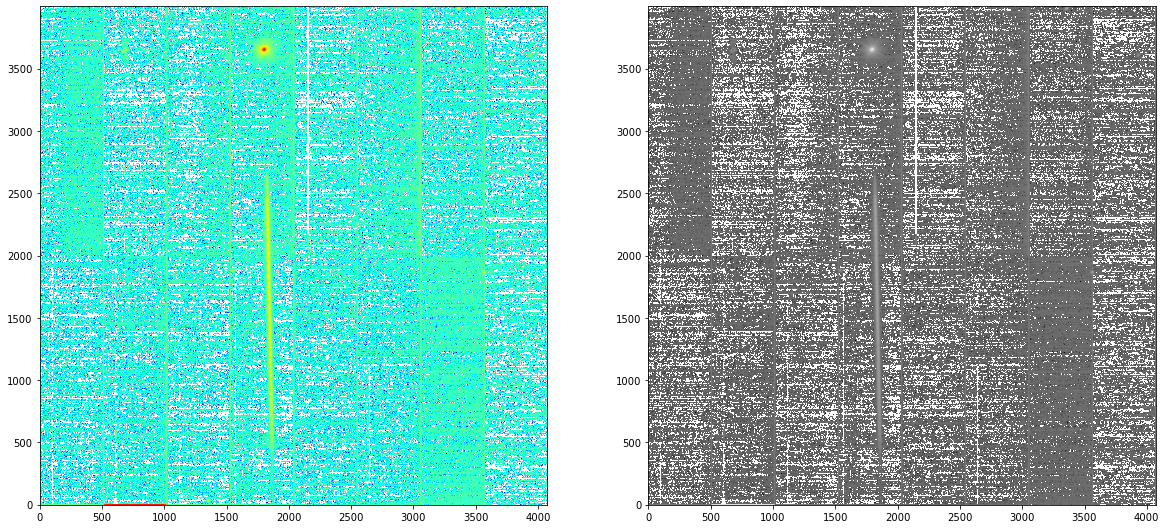

In [40]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(121)
ax.imshow(flip_image,origin='lower',cmap="jet",norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(flip_image,origin='lower',cmap="gray",norm=LogNorm())
plt.show()

In [41]:
type(flip_image)

numpy.ndarray

In [42]:
exp_image.shape

(4000, 4072)

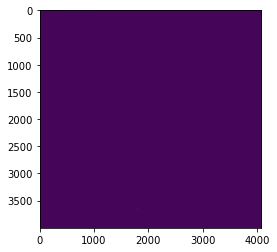

In [43]:
plt.imshow(flip_image)

## Meta Data

In [44]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [45]:
del md['DATASEC']
del md['COMMENT']
ha = md['HASTART']
#del md['HASTART']
md['HA'] = ha

In [46]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'ORIGIN': 'LSST DM Header Service',
 'TIMESYS': 'TAI',
 'DATE': '2021-09-10T06:14:57.431',
 'DATE-OBS': '2021-09-10T06:15:30.580',
 'DATE-BEG': '2021-09-10T06:15:30.580',
 'DATE-END': '2021-09-10T06:15:31.809',
 'MJD': 59467.2603869294,
 'MJD-OBS': 59467.2607706072,
 'MJD-BEG': 59467.2607706072,
 'MJD-END': 59467.2607848236,
 'OBSID': 'AT_O_20210909_000600',
 'GROUPID': '2021-09-10T06:15:13.907',
 'IMGTYPE': 'OBJECT',
 'BUNIT': 'adu',
 'FACILITY': 'Vera C. Rubin Observatory',
 'TELESCOP': 'LSST AuxTelescope',
 'INSTRUME': 'LATISS',
 'OBSERVER': 'LSST',
 'OBS-LONG': -70.749417,
 'OBS-LAT': -30.244639,
 'OBS-ELEV': 2663.0,
 'OBSGEO-X': 1818938.94,
 'OBSGEO-Y': -5208470.95,
 'OBSGEO-Z': -3195172.08,
 'RA': 7.82704125,
 'DEC': -43.6063888888889,
 'RASTART': 7.80715033584355,
 'DECSTART': -43.6319950821744,
 'RAEND': 7.8070246880268,
 'DECEND': -43.6321329722749,
 'ROTPA': 119.983239100187,
 'ROTCOORD': 'sky',
 'HASTART': 0.29233749648168,
 'ELSTART': 76.3

# Start

In [47]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [48]:
all_my_exp_array=[]
all_my_header=[]
all_my_object=[]
all_my_seq=[]
all_my_grating=[]
all_my_filter=[]
all_my_date=[]


for seqNum in all_myseq:
    exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    
    header=md.toDict()
    
    #decode header
    
    obj_name=header['OBJECT']
    obj_name2 = ''.join(obj_name.split())
    grating=header['GRATING']
    obsid=header['OBSID']
    date=obsid.replace('AT_O_','') # remove pre-tag to get date only and seqnum
    filter_name=header['FILTER']
    filter_name2=filter_name.split("_")[0]   # cut empty_1 to empty
    
    # work on header to remove bad things for ds9
    del header['DATASEC']
    del header['COMMENT']
    ha = header['HASTART']
    #del header['HASTART']
    header['HA'] = ha
        
    
    
    # select only pre-selected disperser
    if grating == DISPERSER_SEL and not FLAG_FLAT_SELECTION: 
        exp_image=exp.image.array
        flip_image=np.flip(exp_image, 0)  # flip the image for Spectractor
        all_my_exp_array.append(np.copy(flip_image))
        all_my_header.append(header)
        all_my_object.append(obj_name2)
        all_my_seq.append(header['SEQNUM'])
        all_my_grating.append(grating)
        all_my_filter.append(filter_name2)
        all_my_date.append(date)
    else:  # Flats
        exp_image=exp.image.array
        flip_image=np.flip(exp_image, 0)  # flip the image for Spectractor
        all_my_exp_array.append(np.copy(flip_image))
        all_my_header.append(header)
        all_my_object.append(obj_name2)
        all_my_seq.append(header['SEQNUM'])
        all_my_grating.append(grating)
        all_my_filter.append(filter_name2)
        all_my_date.append(date)

CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000600: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000601: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000602: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000603: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000604: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000605: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000606: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_0006

In [49]:
idx=0
for exp_img in all_my_exp_array:
    print(idx,"......" ,exp_img.shape,'obj=',all_my_object[idx],"filt=",all_my_filter[idx],"disp=",all_my_grating[idx])
    idx+=1

0 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
1 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
2 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
3 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
4 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
5 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
6 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
7 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
8 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
9 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
10 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
11 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
12 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
13 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
14 ...... (4000, 4072) obj= HD2811 filt= empty disp= ronchi170lpmm
15 ..

## Total number of images

In [50]:
NSEL=len(all_my_exp_array)

In [51]:
NSEL

30

# Plot

In [52]:
idx=0

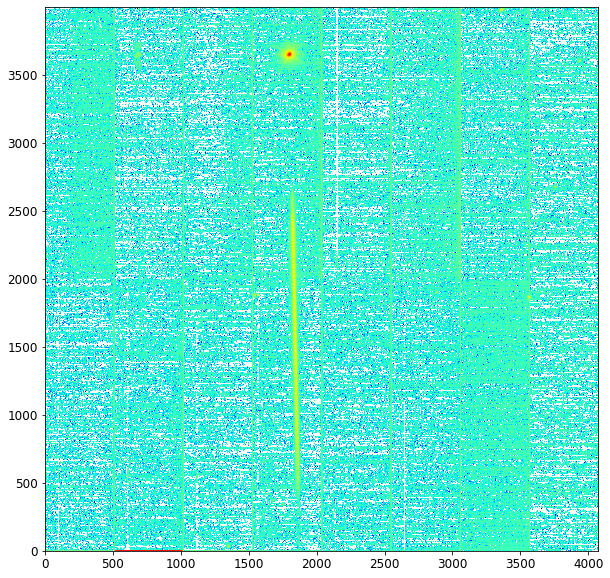

In [53]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(all_my_exp_array[idx],origin='lower',cmap="jet",norm=LogNorm())
plt.show()

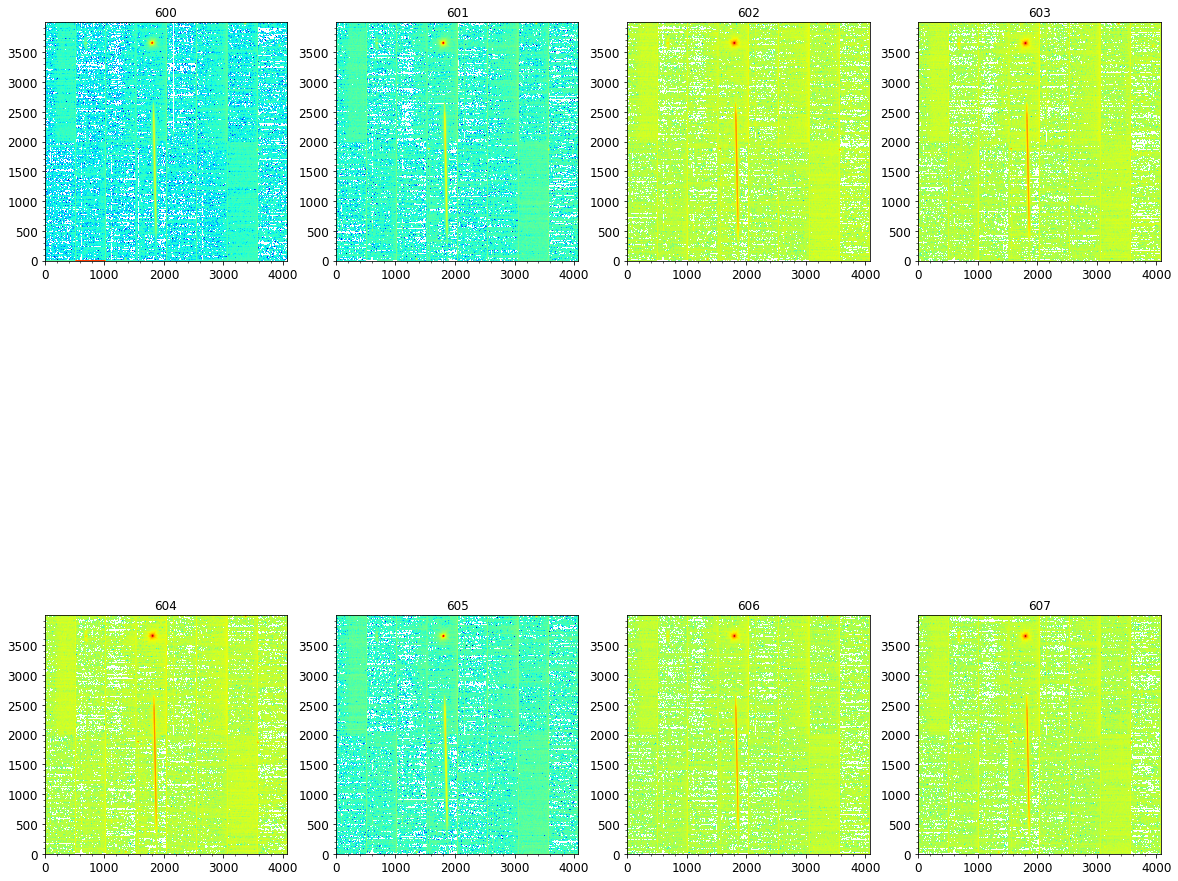

In [54]:

Ncol=4
Nrow=2
Ntot=Ncol*Nrow

fig = plt.figure(figsize=(20,20))

# loop on angle
for idx in np.arange(Ntot):
    if idx>=NSEL:
        break
        
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_exp_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx]) 
    ax.minorticks_on()
    ax.set_aspect("equal")
    
    #ax2=ax.twiny()
    #ax2.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    #ax2.set_xlim(ax.get_xlim())
    #ax2.minorticks_on()
    
    #ax.tick_params(which='major', length=10, width=2, direction='inout')
    #ax.tick_params(which='minor', length=5, width=2, direction='inout')
    #ax.grid(which='both')



    #ax.set_aspect('equal')

    #x1, x2 = ax.get_xlim() 
    #y1, y2 = ax.get_ylim() 
plt.show()

In [55]:
#all_my_raw_array=[]
#all_my_header=[]
#all_my_object=[]
#all_my_seq=[]
#all_my_grating=[]
#all_my_filter=[]


In [56]:
if FLAG_SAVE_IMAGE:
  
    for idx in np.arange(NSEL):
        filename=all_my_grating[idx]+"_"+all_my_filter[idx]+"_"+all_my_object[idx]+"_"+all_my_date[idx]+"_quickLookExp.fits"
        print(filename)
    
        hdr = fits.Header()
    
        for key,value in all_my_header[idx].items():
            hdr[str(key)]=value
        
        #hdu = fits.PrimaryHDU(data=all_my_exp_array[idx],header=hdr)  # with headers
        #hdul = fits.HDUList([hdu])
        #hdul.writeto(filename,overwrite=True)
        
        primary_hdu = fits.PrimaryHDU(header=hdr)
        image_hdu = fits.ImageHDU(all_my_exp_array[idx])
        hdu_list = fits.HDUList([primary_hdu, image_hdu])
    
        hdu_list.writeto(filename,overwrite=True)
    
        

ronchi170lpmm_empty_HD2811_20210909_000600_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000601_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000602_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000603_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000604_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000605_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000606_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000607_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000608_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000609_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000610_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000611_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000612_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000613_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000614_quickLookExp.fits
ronchi170lpmm_empty_HD2811_20210909_000615_quickLookExp.fits
ronchi170lpmm_empty_HD28